In [2]:
import re, string,os
from glob import glob as gb
import pandas as pd
from collections import Counter
from tqdm import tqdm
from functions import *

plotting.style_('Paired',n_var=12)

In [1]:
base_path = "/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase"

In [3]:
tf = pd.read_csv('/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/resources/keywords-corona-translation.csv')
tf_corona = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}

tf = pd.read_csv('/media/ruben/OSDisk/Users/ruben.ros/Documents/GitHub/ParlaMintCase/resources/keywords-expertise-translation.csv')
tf_science = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}

In [4]:
def plot_regular(language,normalized=False):
    data = data_loader.period(language=language,data_version="lemmatized",start_date="2019-11",end_date="2020-12")
    data = utils.add_metadata(data,language)
    total_data = pd.read_csv(os.path.join(base_path,"resources/totals",f"{language}-total-tokens.csv"))
    total_data = pd.Series(total_data.n.values,index=total_data.month).to_dict()
    terms = [v for k,v in tf_corona[language].items()]
    freq_data = frequency.information(data,terms,exact_match=True,period_format="month")
    d = frequency.distribution(freq_data,metadata_selectors=[])
    d.columns = [x.replace('_hits','') for x in d.columns]
    if normalized == True:
        for c in list(d.columns)[1:]:
            d[c] = [x / total_data[d['date'][c]] if total_data[d['date'][c]] != 0 else x for c,x in enumerate(d[c])]
            lab = "Rel"
    else:
        lab = "Abs"
    
    p = d.plot.bar(stacked=True,x='date',y=list(d.columns)[1:],figsize=(10,5))
    plt.title(f'{lab}. Frequency Corona-Terms ({language.upper()})')
    lgd = plt.legend([f"{c} ({[k for k,v in tf_corona[language].items() if v == c][0]})" for c in list(d.columns)[1:]],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Months')
    plt.ylabel(lab + ". Frequency")
    fig = p.get_figure()
    fig.savefig(f'{base_path}/results/plots/frequencies/coronawords-{language}-{lab.lower()}-freq.png',dpi=350, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()

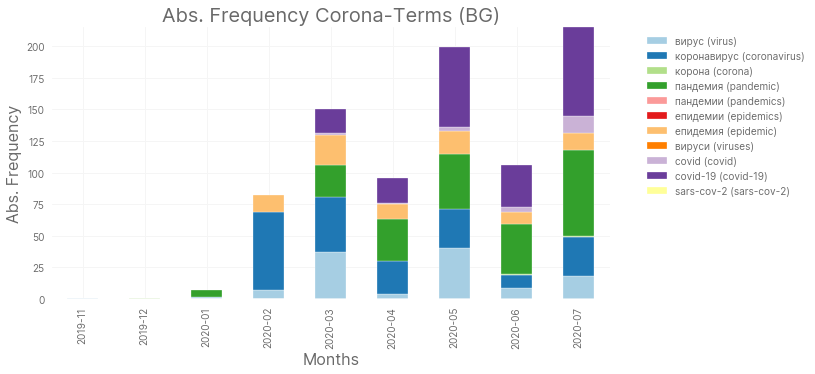

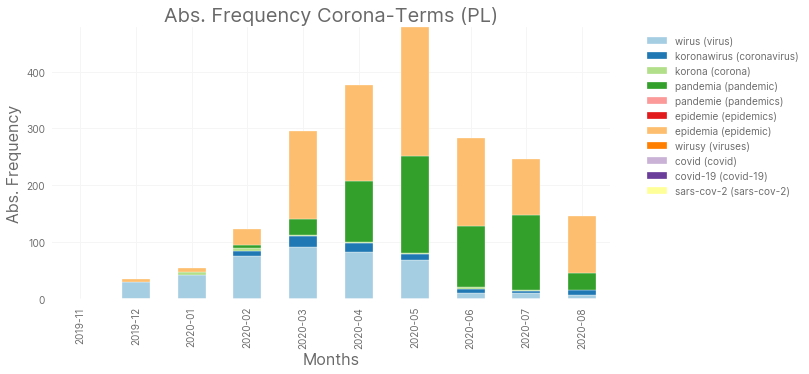

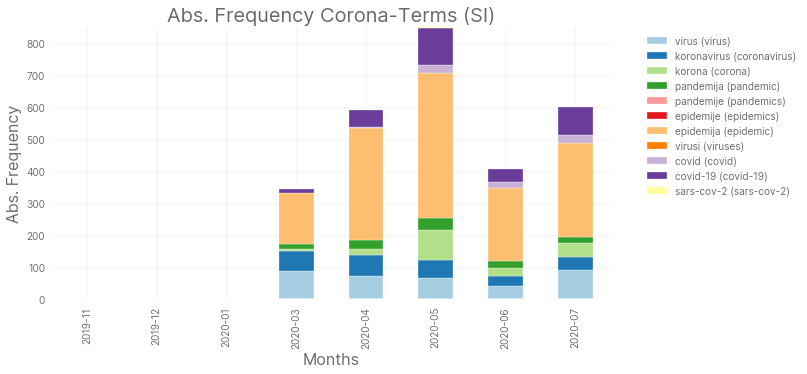

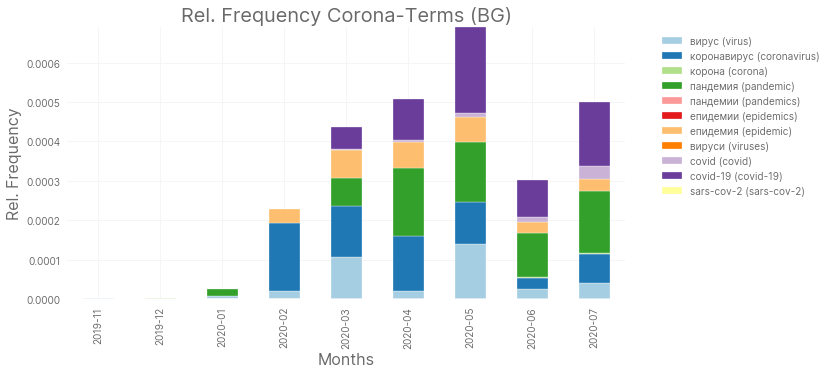

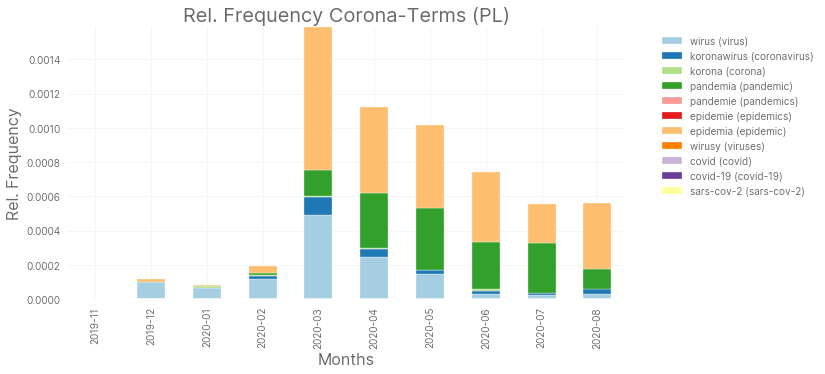

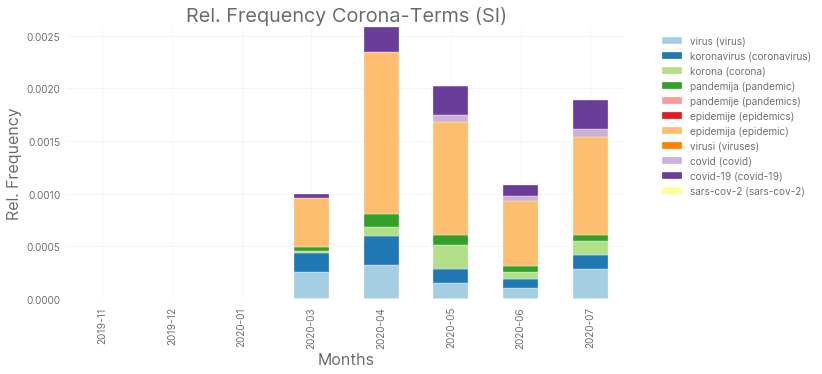

In [5]:
plot_regular('bg')
plot_regular('pl')
plot_regular('si')
plot_regular('bg',normalized=True)
plot_regular('pl',normalized=True)
plot_regular('si',normalized=True)

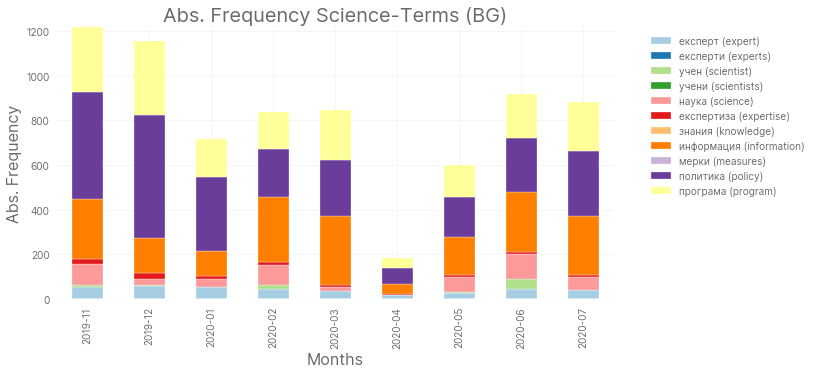

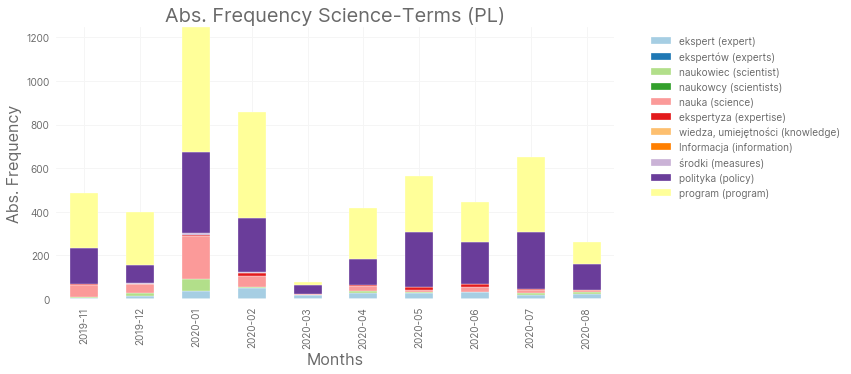

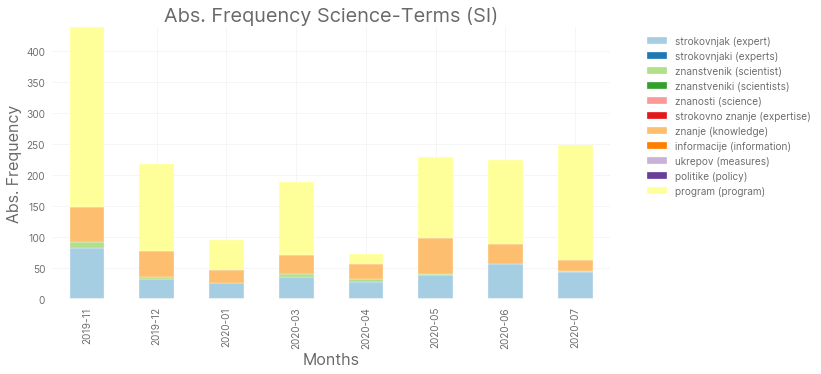

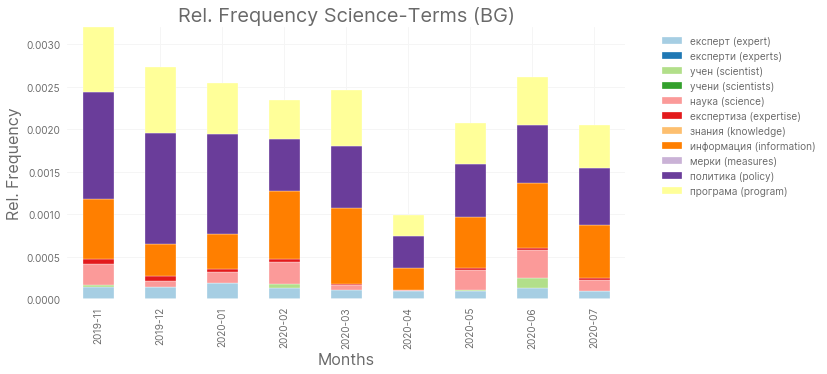

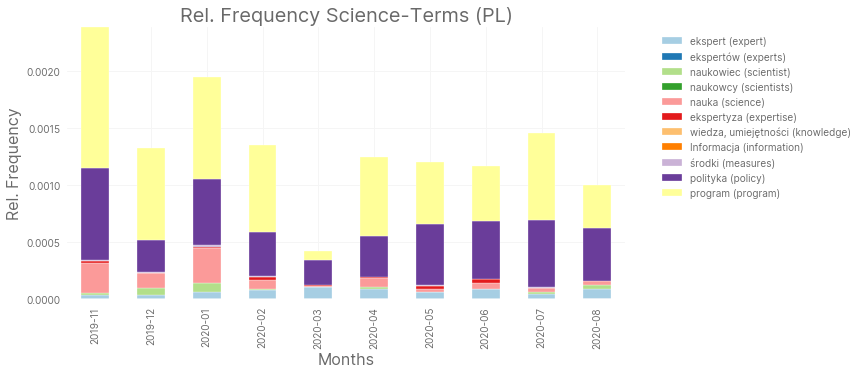

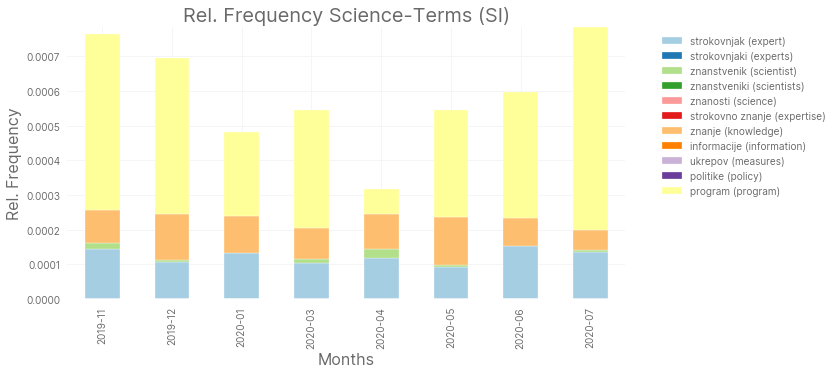

In [6]:
## Science Terms

def plot_regular(language,normalized=False):
    data = data_loader.period(language=language,data_version="lemmatized",start_date="2019-11",end_date="2020-12")
    data = utils.add_metadata(data,language)
    total_data = pd.read_csv(os.path.join(base_path,"resources/totals",f"{language}-total-tokens.csv"))
    total_data = pd.Series(total_data.n.values,index=total_data.month).to_dict()
    terms = [v for k,v in tf_science[language].items()]
    freq_data = frequency.information(data,terms,exact_match=True,period_format="month")
    d = frequency.distribution(freq_data,metadata_selectors=[])
    d.columns = [x.replace('_hits','') for x in d.columns]
    if normalized == True:
        for c in list(d.columns)[1:]:
            d[c] = [x / total_data[d['date'][c]] if total_data[d['date'][c]] != 0 else x for c,x in enumerate(d[c])]
            lab = "Rel"
    else:
        lab = "Abs"
    
    p = d.plot.bar(stacked=True,x='date',y=list(d.columns)[1:],figsize=(10,5))
    plt.title(f'{lab}. Frequency Science-Terms ({language.upper()})')
    lgd = plt.legend([f"{c} ({[k for k,v in tf_science[language].items() if v == c][0]})" for c in list(d.columns)[1:]],bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Months')
    plt.ylabel(lab + ". Frequency")
    fig = p.get_figure()
    fig.savefig(f'{base_path}/results/plots/frequencies/sciencewords-{language}-{lab.lower()}-freq.png',dpi=350, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()

plot_regular('bg')
plot_regular('pl')
plot_regular('si')
plot_regular('bg',normalized=True)
plot_regular('pl',normalized=True)
plot_regular('si',normalized=True)

In [27]:
windows_data = utils.windowizer(data,['wirus','koronawirus','korona'],window=12)

In [28]:
polarity_parser = polarity(language="pl")
windows_data['chen'] = [polarity_parser.chen_classifier(i) for i in tqdm(windows_data['window'])]
windows_data['date'] = [re.search(r'\d{4}-\d{2}', text).group() for text in windows_data['id']]
windows_data = windows_data.sort_values('date')
fig = plt.figure(figsize=(15,5))
sns.violinplot(data=windows_data,x = 'date',y = 'chen')